In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/placement-prediction/modified_placement_data.csv
/kaggle/input/placement-prediction/placement.csv


# Steps : 

1. Preprocess + EDA + Feature Selection
2. Extract input and output columns
3. Scale the values
4. Train test split / cross validation
5. Train the model
6. Evaluate the model / model selection
7. Deploy the model 


In [10]:
import numpy as np
import pandas as pd

In [49]:
df=pd.read_csv('/kaggle/input/placement-prediction/placement.csv')

In [50]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [51]:
df.shape


(100, 4)

# 1. Preprocess : 


In [52]:
# check is there any missing values : 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [53]:
# remove Unnamed col : 
df=df.iloc[:,1:]

In [55]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


# 2. EDA : 

In [56]:
import matplotlib.pyplot as plt

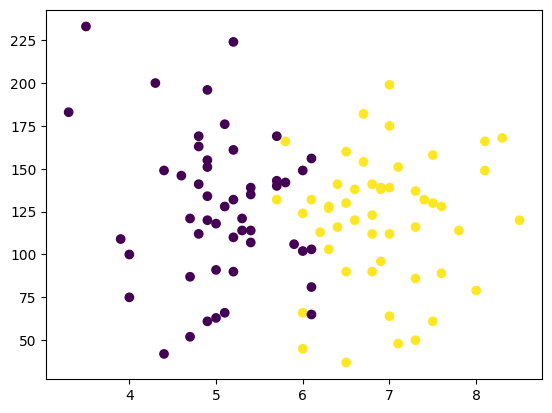

In [57]:
# plotted a scatter plot iq by cgpa and coloured those dots who got placement : 
plt.scatter(df['cgpa'],df['iq'], c=df['placement'])

as the data is linear we can use Logistic Regression . 

# 3. Extract input output columns : 

In [58]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [59]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [60]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

# 3. Train Test Split : 

In [62]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [63]:
X_train

,cgpa,iq
59,4.8,112.0
22,4.9,120.0
85,5.8,166.0
41,5.4,114.0
42,7.6,89.0
...,...,...
58,8.0,79.0
3,7.4,132.0
8,6.1,156.0
49,5.4,135.0


In [64]:
X_test

,cgpa,iq
31,3.9,109.0
36,5.7,140.0
83,7.5,130.0
88,4.4,149.0
48,6.6,138.0
57,6.5,130.0
68,4.0,75.0
29,7.0,112.0
56,6.1,65.0
14,6.1,103.0


In [65]:
Y_train

59    0
22    0
85    1
41    0
42    1
     ..
58    1
3     1
8     0
49    0
76    0
Name: placement, Length: 90, dtype: int64

In [66]:
Y_test

31    0
36    0
83    1
88    0
48    1
57    1
68    0
29    1
56    0
14    0
Name: placement, dtype: int64

# 4. Scaling : 

In [67]:
# now we will scale the values between -1 to 1 : 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)

In [68]:
X_train

array([[-1.07655683, -0.30661768],
       [-0.98791079, -0.11073061],
       [-0.19009649,  1.01562004],
       [-0.54468063, -0.25764591],
       [ 1.40553211, -0.869793  ],
       [-1.07655683,  0.94216239],
       [-0.63332666, -0.08624472],
       [-1.07655683,  0.40347295],
       [-0.72197269, -0.35558945],
       [ 0.60771781,  1.40739418],
       [-0.63332666, -0.25764591],
       [ 0.25313367, -0.52699063],
       [-0.01280443, -0.55147652],
       [ 1.13959401,  0.30552942],
       [-0.01280443, -0.01278707],
       [-0.89926476, -1.50642598],
       [-0.54468063,  0.35450118],
       [ 0.69636384, -0.84530712],
       [ 0.87365591,  1.235993  ],
       [ 0.51907177, -0.11073061],
       [-0.81061873,  1.26047888],
       [ 0.87365591, -1.4819401 ],
       [-0.19009649,  0.42795883],
       [ 0.69636384,  0.40347295],
       [-0.98791079,  1.75019656],
       [-0.81061873, -1.43296833],
       [-0.98791079, -1.55539775],
       [ 0.25313367,  0.06067058],
       [-0.72197269,

In [69]:
X_test=scaler.transform(X_test)

In [70]:
X_test

array([[-1.87437113, -0.38007533],
       [-0.27874253,  0.37898707],
       [ 1.31688607,  0.13412823],
       [-1.43114096,  0.59936002],
       [ 0.51907177,  0.3300153 ],
       [ 0.43042574,  0.13412823],
       [-1.78572509, -1.21259538],
       [ 0.87365591, -0.30661768],
       [ 0.07584161, -1.45745421],
       [ 0.07584161, -0.52699063]])

# 5. Model Training : 



In [76]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

In [79]:
clf.fit(X_train,Y_train)

LogisticRegression()

# 6. Evaluate the model : 

In [83]:
Y_pred=clf.predict(X_test)

In [84]:
Y_test

31    0
36    0
83    1
88    0
48    1
57    1
68    0
29    1
56    0
14    0
Name: placement, dtype: int64

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
accuracy_score(Y_test,Y_pred)

0.8

In [88]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

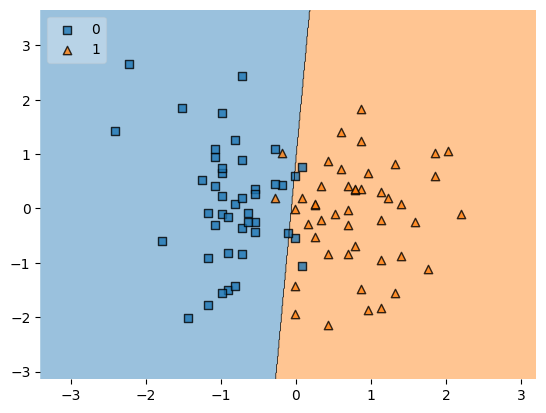

In [92]:
plot_decision_regions(X_train,Y_train.values, clf=clf, legend=2)

# 7. Deploy Demo : 

In [94]:
import pickle

In [96]:
pickle.dump(clf,open('model.pkl','wb'))